<h2>垃圾站分布</h2>

/Users/baidu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


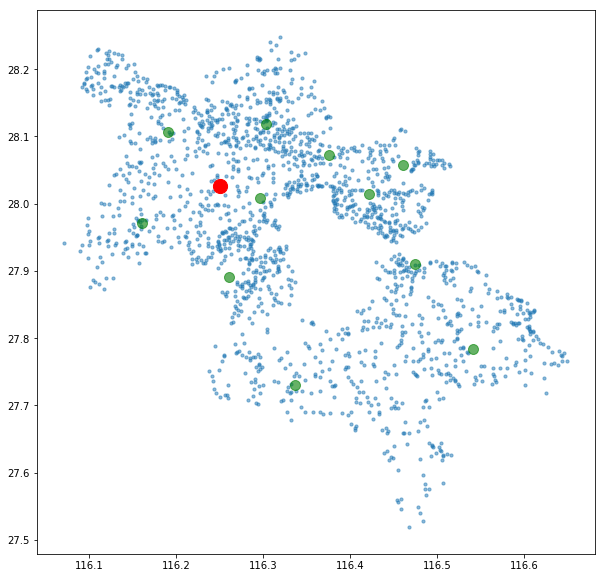

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_excel(io="data/garbage.xls", header=1)
data.dropna(axis=1, how='all', inplace=True)
data.rename(columns=
            {'编码':'id',
             '名称':'name',
             '经度':'lng',
             '纬度':'lat',
             '收集类型.1':'collectType',
             '设施类型.1':'facilityType',
             '垃圾日处理量':'weight',
             '设备类型.1':'equipType',
             '容量（L）':'volume',
             '偏转后经度':'rotateLng',
             '偏转后纬度':'rotateLat'}, inplace=True)

gabage = data[data['facilityType'] == '收集点']
# 单位处理时间 5 min
gabage['serviceTime'] = 5
station = data[data['facilityType'] == '中转站']
processStation = data[data['facilityType'] == '处置端']

x = gabage['lng']
y = gabage['lat']
x2 = station['lng']
y2 = station['lat']
x3 = processStation['lng']
y3 = processStation['lat']

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot()
ax.scatter(x, y, s=10, alpha=0.5) # 垃圾站
ax.scatter(x2, y2, s=100, c='green', alpha=0.6)  # 中转站
ax.scatter(x3, y3, s=200, c='red') # 焚烧站
plt.show()
gabage[['id','lng','lat','weight','serviceTime']].to_csv("inputNode.csv", index=False)
station[['id','lng','lat']].to_csv("inputDepot.csv", index=False)

In [22]:
changkai = pd.read_excel("data/changkaiDistrict.xls", dtype=object)
#                 {'偏转后纬度':str,
#                  '偏转后经度':str})
changkai.rename(columns=
               {'收集点名称':'id',
                '偏转后纬度':'lat',
                '偏转后经度':'lng',
                '垃圾日产量':'weight'}, inplace=True)
# changkai[['lat', 'lng']] = changkai[['lat', 'lng']].astype(str)
changkai['serviceTime'] = 5
# changkai.to_csv("data/inputNodeSingle.csv", index=False)



In [ ]:
{}